# PySP开发测试区

## 0. 测试准备

### 0.1 测试环境导入

In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 0.2 测试数据生成

In [4]:
import numpy as np
fs = 1000.0
t = np.arange(0, 5, 1/fs)

# 多个谐波分量
harmonics = (
    2 * np.sin(2 * np.pi * 50 * t) +      # 50Hz
    1.5 * np.sin(2 * np.pi * 120 * t) +   # 120Hz
    np.sin(2 * np.pi * 250 * t)           # 250Hz
)

# 冲击序列
impulse = np.zeros_like(t)
impulse_indices = [200, 500, 700]
impulse[impulse_indices] = [5, -4, 6]

# 随机噪声冲击
random_impulse = np.zeros_like(t)
random_indices = np.random.choice(len(t), 5, replace=False)
random_impulse[random_indices] = np.random.uniform(-3, 3, size=5)

# 白噪声
white_noise = np.random.normal(0, 0.5, size=len(t))

# 合成信号
Data = harmonics + impulse + random_impulse + white_noise


## 1. Signal模块测试

### 1.1 Signal.Axis()

In [5]:
# --------------------------------------------------------------------------------------------#
# 测试接口
from PySP.Signal import Axis,t_Axis

# --------------------------------------------------------------------------------------------#
# 辅助接口


# --------------------------------------------------------------------------------------------#
# 测试过程

axis= Axis(N=10000,dx=0.1,x0=1.0,name="x",unit='u')
t_axis= t_Axis(len(axis),fs=1000.0)

print(axis)
print(t_axis)

Axis(x=[1.0000e+00 1.1000e+00 1.2000e+00 ... 1.0007e+03 1.0008e+03 1.0009e+03]u)
t_Axis(时间=[0.000e+00 1.000e-03 2.000e-03 ... 9.997e+00 9.998e+00 9.999e+00]s)


### 1.2 Signal.Series()

Series[测试信号](位移=[-0.62108031  1.89136298  2.88562937 ... -2.46411021 -2.37008549
 -2.52449704]μm, t_Axis(时间=[0.000e+00 1.000e-03 2.000e-03 ... 4.997e+00 4.998e+00 4.999e+00]s))


f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Signal_Module\core.py:625: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 900x400 with 1 Axes>,
 array([<AxesSubplot:xlabel='时间/s', ylabel='位移/μm'>], dtype=object))

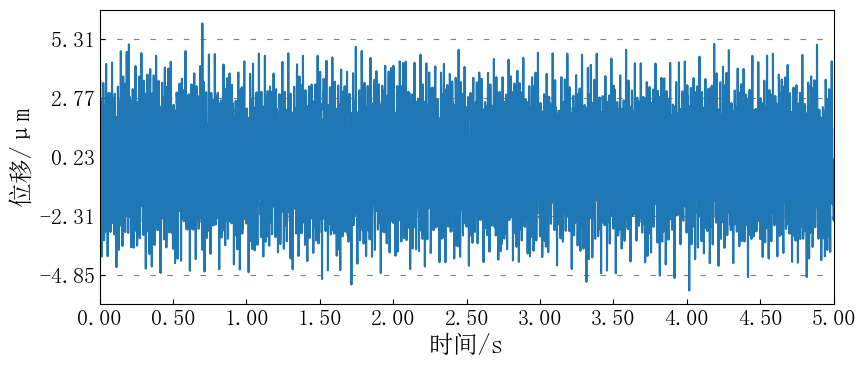

In [20]:
# --------------------------------------------------------------------------------------------#
# 测试接口
from PySP.Signal import Series

# --------------------------------------------------------------------------------------------#
# 辅助接口
from PySP.Signal import t_Axis

# --------------------------------------------------------------------------------------------#
# 测试过程

Srs = Series(
    axis=t_Axis(len(Data), fs=fs), data=Data, name="位移", unit="μm", label="测试信号"
)
print(Srs)
Srs.plot()

### 1.1 Signal.Signal()

Signal[测试信号](位移=[-0.36159038  2.49948384  2.73017132 ... -1.68933073 -2.66758827
 -2.75630769]μm, t_Axis(时间=[0.000e+00 1.000e-03 2.000e-03 ... 4.997e+00 4.998e+00 4.999e+00]s))


f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:183: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


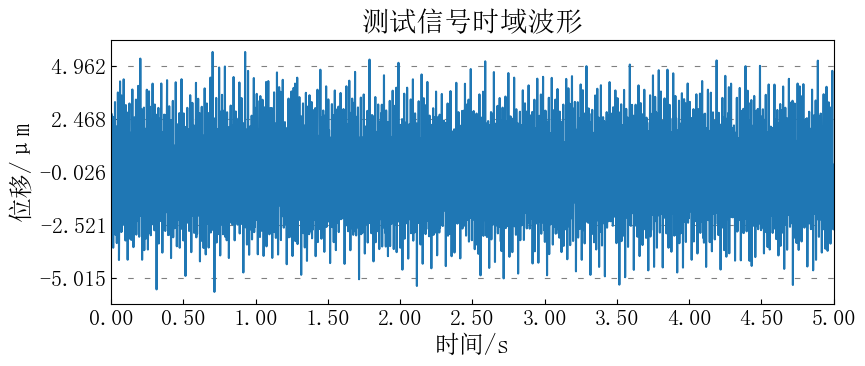

In [5]:
# --------------------------------------------------------------------------------------------#
# 测试接口
from PySP.Signal import Signal
# --------------------------------------------------------------------------------------------#
# 辅助接口
from PySP.Signal import t_Axis
# --------------------------------------------------------------------------------------------#
# 测试过程

Sig = Signal(
    axis=t_Axis(len(Data), fs=fs), data=Data, name="位移", unit="μm", label="测试信号"
)
print(Sig)
Sig.plot()

### 1.4 Signal.Spectra()

Spectra[测试信号](幅值=[1.55898028e-16 5.39904893e-16 1.62631004e-16 ... 4.00932778e-16
 3.02099998e-16 5.26296821e-18]μm, f_Axis(频率=[0.000e+00 1.000e+00 2.000e+00 ... 2.498e+03 2.499e+03 2.500e+03]Hz))


f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:217: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


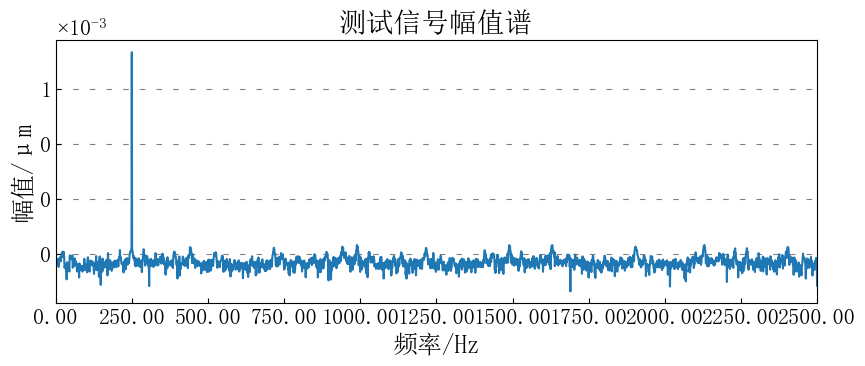

In [6]:
# --------------------------------------------------------------------------------------------#
# 测试接口
from PySP.Signal import Spectra

# --------------------------------------------------------------------------------------------#
# 辅助接口
from PySP.Signal import f_Axis

# --------------------------------------------------------------------------------------------#
# 测试过程
_Data=np.abs(np.fft.rfft(np.sin(2*np.pi*50*t)))/len(t)
Spc = Spectra(
    axis=f_Axis(len(_Data), df=1.0), data=_Data, name="幅值", unit="μm", label="测试信号"
)
print(Spc)
Spc.plot()

### 1.2 Signal.Resample()

Signal[重采样测试信号](位移=[ 1.91213858e-01  3.43890657e+00  7.75337377e-01  1.70203388e+00
 -5.62473583e-01  2.69998913e+00 -3.26549475e+00 -6.62978918e-02
 -4.06804994e+00  2.34162439e-02 -4.58958225e-01  1.69917979e+00
 -1.25958188e+00  3.59276319e+00 -1.13489611e+00  3.49890100e+00
 -3.46206556e+00 -6.23778216e-01 -1.74545202e+00 -1.79612883e-01
 -2.64448977e+00  8.98004292e-01  1.53092889e+00  3.87000803e+00
 -7.47032156e-01  1.30313291e+00 -2.41114869e+00  8.23511562e-01
 -3.41476301e+00 -1.79500683e+00 -5.65917396e-01  2.50512916e+00
  3.40427548e-01  1.65716402e+00  2.80679289e-01  3.00288301e+00
 -2.67153945e+00 -1.00893204e+00 -3.10777104e+00  9.46715742e-01
 -1.76003481e+00  1.56853490e-01 -4.84748116e-01  6.03170412e+00
 -1.57489410e+00  1.18212151e+00 -2.47209018e+00  4.16731384e-01
 -2.92122366e+00 -1.24284853e+00 -3.23749394e+00  3.23270636e+00
  1.09549970e+00  1.99037632e+00 -1.30903012e+00  1.97689341e+00
 -3.22235658e+00 -2.28285569e-01 -4.33271628e+00  5.38106175e-02
 -5.63

f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:171: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


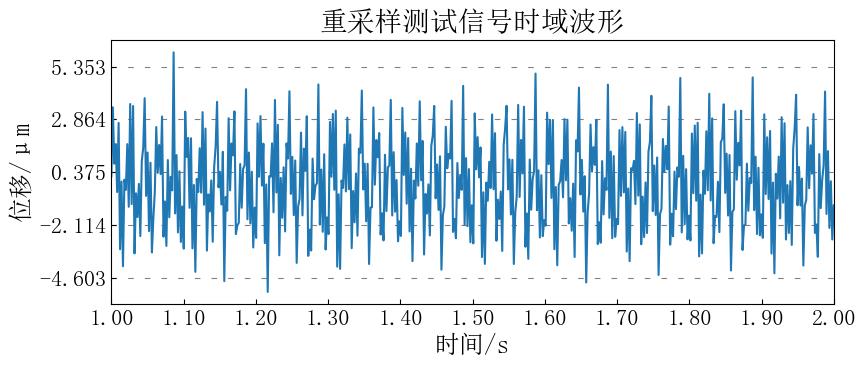

In [9]:
# --------------------------------------------------------------------------------------------#
# 测试接口
from PySP.Signal import Resample

# --------------------------------------------------------------------------------------------#
# 辅助接口
from PySP.Signal import t_Axis,Signal

# --------------------------------------------------------------------------------------------#
# 测试过程
Sig= Signal(axis=t_Axis(len(Data), fs=fs), data=Data, name="位移", unit="μm", label="测试信号")
_Sig= Resample(Sig,type='extreme', dt=Sig.dt*2, t0=1.0, T=1.0)
_Sig.label="重采样测试信号"
print(_Sig)
_Sig.plot()

### 1.3 Signal.Periodic()

Signal[仿真含噪准周期信号](=[-0.41241824  2.43193156  4.02464415 ...  2.2954509   0.99614465
  1.98609677], t_Axis(时间=[0.000e+00 1.000e-03 2.000e-03 ... 1.997e+00 1.998e+00 1.999e+00]s))


f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:171: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


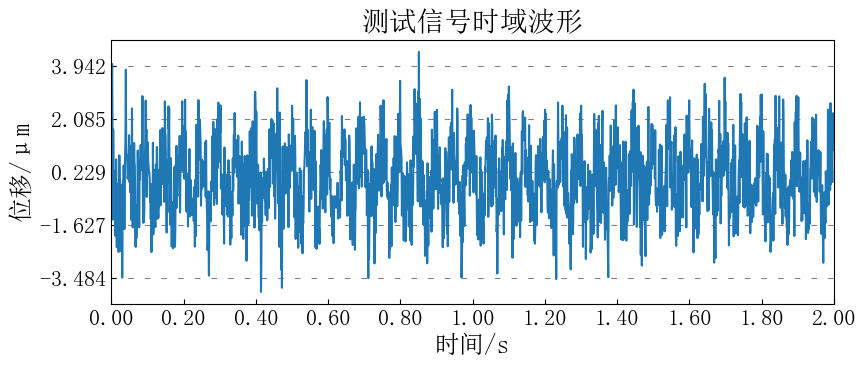

In [10]:
# --------------------------------------------------------------------------------------------#
# 测试接口
from PySP.Signal import Periodic

# --------------------------------------------------------------------------------------------#
# 辅助接口

# --------------------------------------------------------------------------------------------#
# 测试过程
Sig = Periodic(fs=1000.0, T=2.0, CosParams=((20, 1, 32), (50, 0.5, 0)), noise=1.0)
print(repr(Sig))
Sig.name, Sig.unit, Sig.label = '位移', 'μm', '测试信号'
Sig.plot()

## 2. Plot模块测试

### 2.1 Plot.Plot()

f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\core.py:363: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.figure.show()


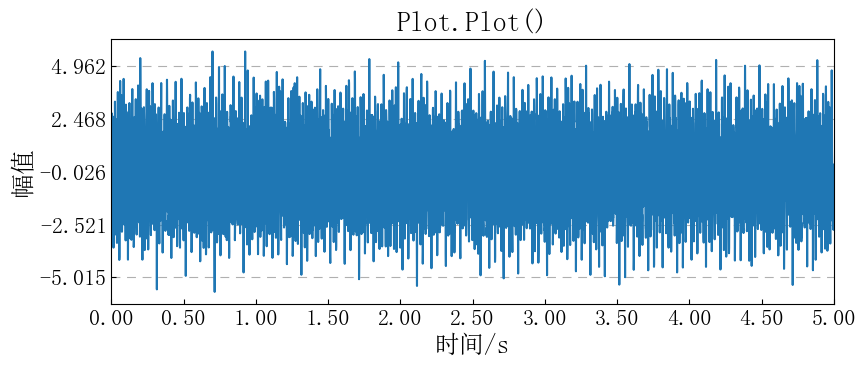

In [ ]:
# --------------------------------------------------------------------------------------------#
# 测试接口
from PySP.Plot import Plot
# --------------------------------------------------------------------------------------------#
# 辅助接口
from PySP.Signal import Signal, t_Axis
# --------------------------------------------------------------------------------------------#
# 测试过程
Sig = Signal(
    axis=t_Axis(len(Data), fs=fs), data=Data, name="位移", unit="um", label="测试信号"
)
class TestPlot(Plot):
    def plot(self, Sig: 'Signal', **kwargs):
        def _draw_plot(ax, data):
            ax.plot(data.__axis__(), data.data, label=data.label)
        task_kwargs = self.kwargs
        task_kwargs.update(kwargs)
        task = {
            "data": Sig,
            "kwargs": task_kwargs,
            "function": _draw_plot,
            "plugins": [], 
        }
        self.tasks.append(task)
        return self
test=TestPlot(xlabel="时间/s", ylabel="幅值", title="Plot.Plot()",).plot(Sig).show()

### 2.2 Plot.LinePlot()

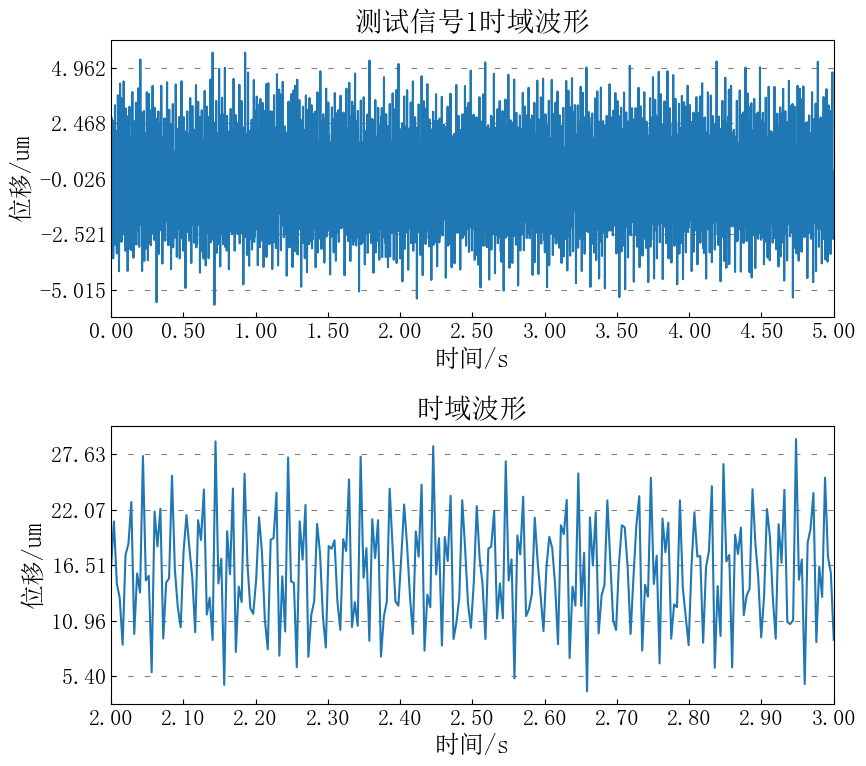

In [9]:
# --------------------------------------------------------------------------------------------#
# 测试接口
from PySP.Plot import LinePlot
# --------------------------------------------------------------------------------------------#
# 辅助接口
from PySP.Signal import Signal, t_Axis, Resample
# --------------------------------------------------------------------------------------------#
# 测试过程
Sig1 = Signal(axis=t_Axis(len(Data), fs=fs), data=Data, name="位移", unit="um", label="测试信号1")
Sig2 = (Sig1 + 2) * 3 + 10
Sig2.label = "测试信号2"
Sig2 = Resample(Sig=Sig2, dt=Sig1.dt*4, t0=2.0, T=1.0)
Plot = LinePlot(isSampled=True, title="Plot.LinePlot()")
Plot.timeWaveform(Sig1, ybins=7)
Plot.timeWaveform(Sig2)
Plot.show(pattern='return')
import matplotlib.pyplot as plt
plt.show()

### 2.3 Plot.PeakfinderPlugin()

In [13]:
Plot.tasks

deque([])

f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\core.py:363: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.figure.show()


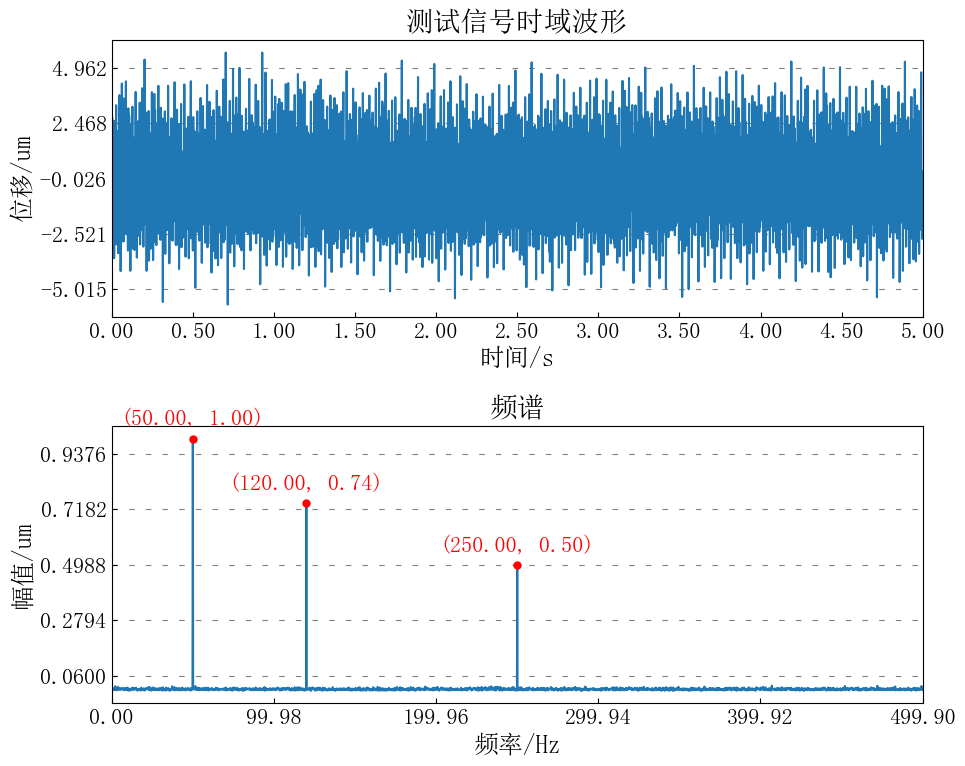

In [17]:
# --------------------------------------------------------------------------------------------#
# 测试接口
from PySP.Plot import PeakfinderPlugin
# --------------------------------------------------------------------------------------------#
# 辅助接口
from PySP.Plot import LinePlot
from PySP.Signal import Signal, t_Axis,f_Axis, Spectra
from scipy.fftpack import fft
# --------------------------------------------------------------------------------------------#
# 测试过程
Sig = Signal(axis=t_Axis(len(Data), fs=fs), data=Data, name="位移", unit="um", label="测试信号")
Plot = LinePlot(isSampled=True, figsize=(10, 4), title="Plot.PeakfinderPlugin()")
Plot.timeWaveform(Sig)
F_x = np.abs(fft(Sig.data)) / Sig.N
Spc= Spectra(axis=Sig.f_axis, data=F_x, name="幅值", unit="um", label="测试信号")
Plot.spectrum(Spc)
Plot.set_params_to_task(xlim=(0,500), title="频谱")
Plot.add_plugin_to_task(PeakfinderPlugin(distance=50, prominence=0.1))
Plot.show()

## 3. Analysis模块测试

### 3.1 Analysis.Analysis()

f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:217: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:183: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


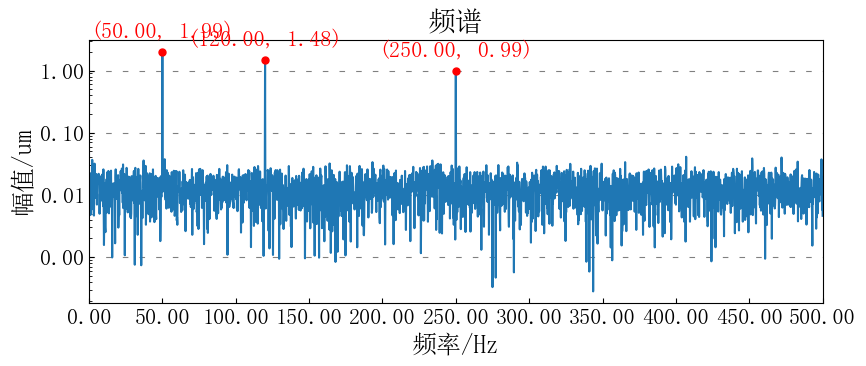

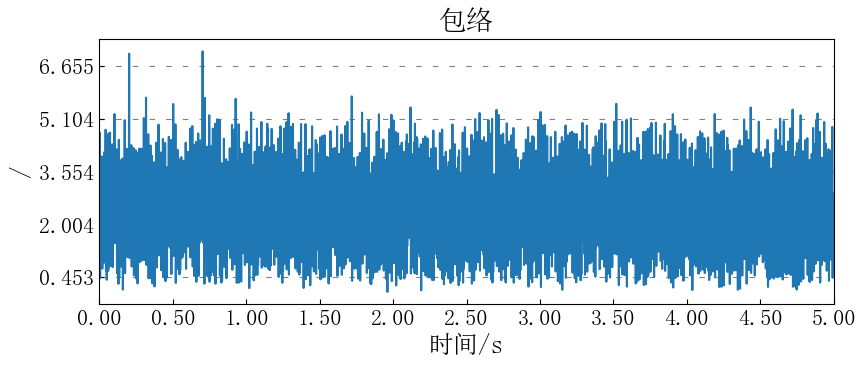

In [24]:
# --------------------------------------------------------------------------------------------#
# 测试接口
from PySP.Analysis import Analysis
# --------------------------------------------------------------------------------------------#
# 辅助接口
from PySP.Signal import f_Axis, Signal, t_Axis
from PySP.Plot import TimeWaveformFunc, FreqSpectrumFunc
from scipy.signal import hilbert
# --------------------------------------------------------------------------------------------#
# 测试过程
class TestAnalysis(Analysis):
    @Analysis.Plot(TimeWaveformFunc)
    def envelope(self):
        """包络分析"""
        analytic_signal = hilbert(self.Sig.data)
        amplitude_envelope = np.abs(analytic_signal)
        return Signal(axis=t_Axis(len(amplitude_envelope), fs=self.Sig.fs, t0=self.Sig.t0), data=amplitude_envelope, label="包络信号")
    @Analysis.Plot(FreqSpectrumFunc)
    def fft(self):
        """FFT频谱分析"""
        N = self.Sig.N
        Y = np.fft.fft(self.Sig.data)
        P2 = np.abs(Y / N)  # 双边频谱
        P1 = P2[: N // 2 + 1]  # 单边频谱
        P1[1:-1] = 2 * P1[1:-1]
        f = self.Sig.fs * np.arange(0, (N / 2 + 1)) / N
        f = f_Axis(len(P1), df=self.Sig.df)
        return Spectra(axis=f, data=P1, name="幅值", unit="um", label="测试信号")
Sig = Signal(axis=t_Axis(len(Data), fs=fs), data=Data, name="位移", unit="um", label="测试信号")
analysis = TestAnalysis(Sig, isPlot=True, title="频谱")
analysis.fft()
analysis.plot_kwargs['title'] = "包络"
res=analysis.envelope()

## 3.SpectrumAnalysis模块测试

### 3.1 SpectrumAnalysis.window()

Signal[汉宁窗](=[0. 0. 0. ... 0. 0. 0.], t_Axis(时间=[0.000e+00 1.000e-03 2.000e-03 ... 1.097e+00 1.098e+00 1.099e+00]s))


f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:183: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


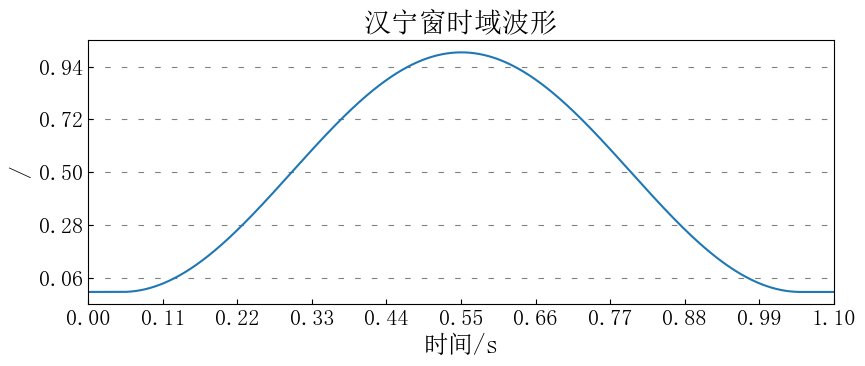

In [25]:
# --------------------------------------------------------------------------------------------#
# 测试接口
from PySP.Analysis import window
# --------------------------------------------------------------------------------------------#
# 辅助接口
from PySP.Signal import Signal, t_Axis
# --------------------------------------------------------------------------------------------#
# 测试过程
data = window(type="汉宁窗", num=1000, padding=50)
res = Signal(axis=t_Axis(len(data), fs=fs), data=data, label="汉宁窗")
print(res)
res.plot()

### 3.2 SpectrumAnalysis.SpectrumAnalysis()

f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:217: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:217: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Spectra[测试信号](包络谱=[25100.96610871 12480.60450978   148.16814637 ...    26.09015915
    30.76204732    27.06401273]μm, f_Axis(频率=[0.000e+00 2.000e-01 4.000e-01 ... 4.994e+02 4.996e+02 4.998e+02]Hz))

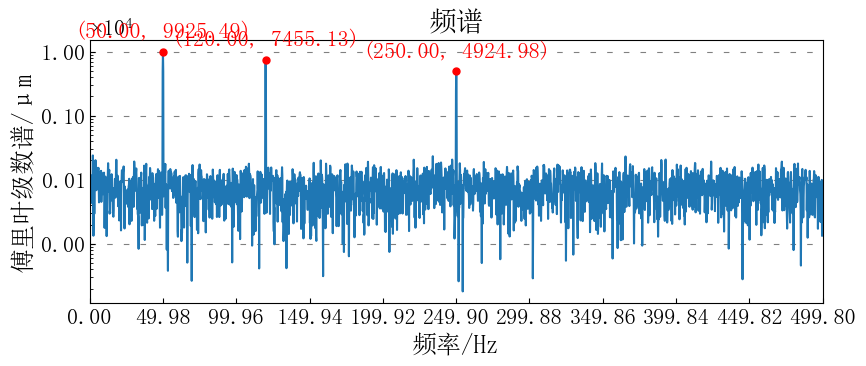

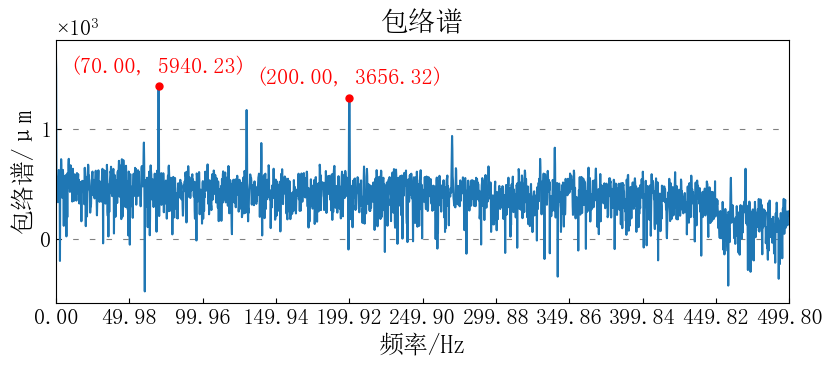

In [27]:
# --------------------------------------------------------------------------------------------#
# 测试接口
from PySP.Analysis import SpectrumAnalysis
# --------------------------------------------------------------------------------------------#
# 辅助接口
from PySP.Signal import Signal, t_Axis
# --------------------------------------------------------------------------------------------#
# 测试过程
Srs = Signal(axis=t_Axis(len(Data), fs=fs), data=Data, name="位移", unit="μm", label="测试信号")
analysis = SpectrumAnalysis(Srs, isPlot=True, title="频谱")
analysis.cft()
analysis.plot_kwargs['title'] = "包络谱"
res
analysis.enve_spectra()